<a href="https://colab.research.google.com/github/swarnadharshini/connect-the-dots-in-a-github-repository/blob/main/TASK_2_THE_SPARKS_FOUNDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#THE SPARKS FOUNDATION - Data Science & Business Analytics Internship

#TASK - 2 Prediction using Unsupervised ML

#AUTHOR - SWARNA DHARSHINI. S

#BATCH - JANUARY 2022

### **K-means Clustering**
This task is to predict the optimum number of clusters and represent it visually. This is an Unsupervised algorithm as it has no prediction variables.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [5]:
iris =   pd.read_csv(io.BytesIO(uploaded['Iris.csv']))  

In [6]:
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


### **Visualization of data**

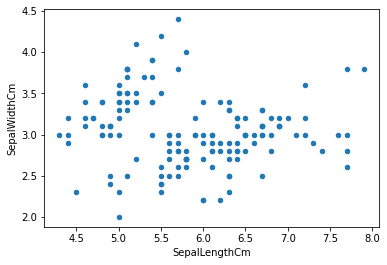

In [8]:
iris.plot(kind="scatter", x="SepalLengthCm",   y="SepalWidthCm")
plt.show()

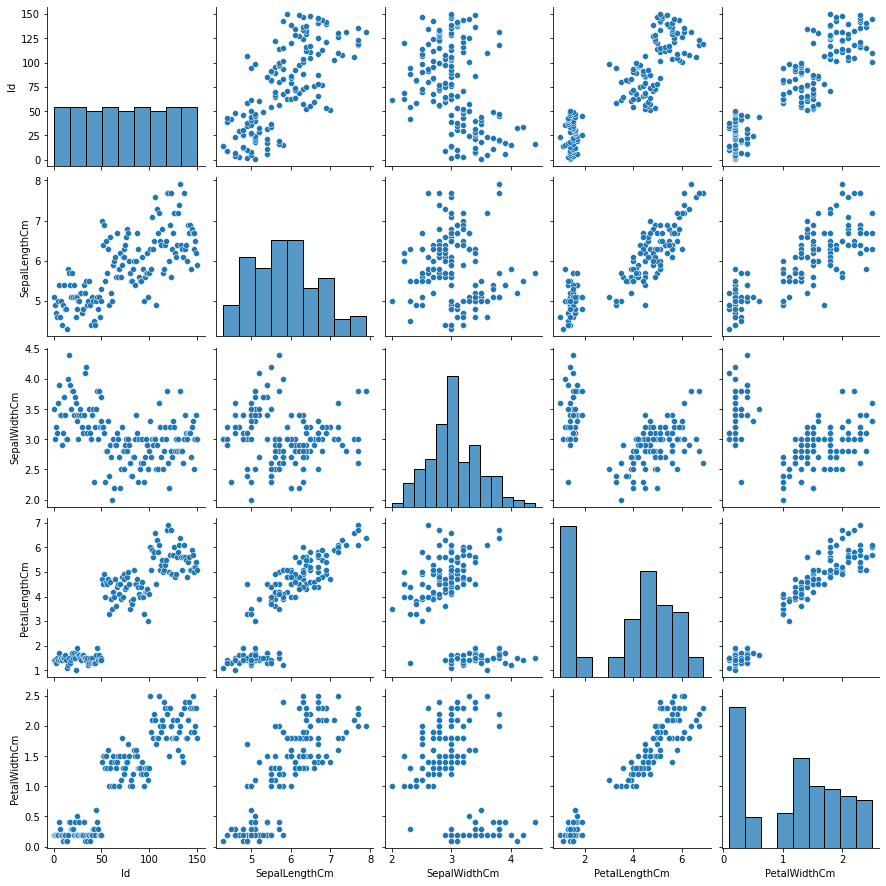

In [9]:
sns.pairplot(iris)

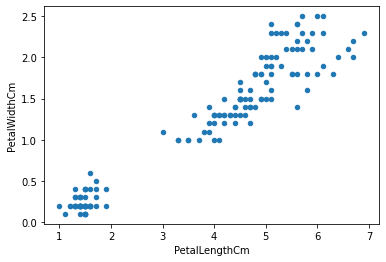

In [10]:
iris.plot(kind="scatter", x="PetalLengthCm",   y="PetalWidthCm")
plt.show()

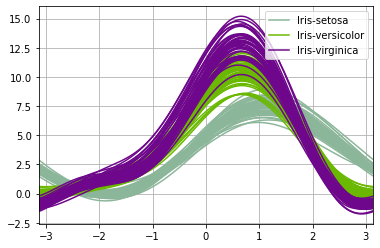

In [11]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")
plt.show()

### **Train-Test Split**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
from sklearn.model_selection import train_test_split
x = iris.iloc[:, :-1].values 
y = iris.iloc[:, -1].values 

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### **Model building**

In [14]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [15]:
iris_data=load_iris()   #loading iris dataset from sklearn.datasets
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) #creating dataframe



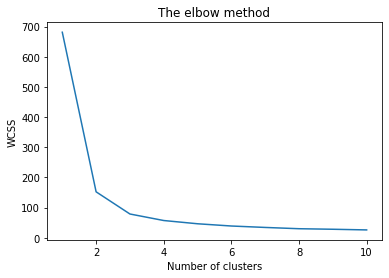

In [16]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

### **Evaluating the model**

In [17]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(kmeans.cluster_centers_) 

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


### **Visualizing the result**

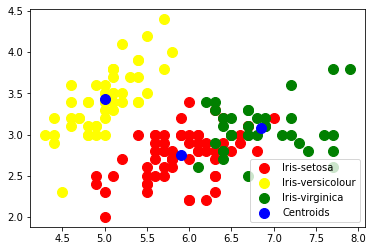

In [18]:
#Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'blue', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

#Conclusion:
The elbow method allows us to pick the optimum no. of clusters for classification. If the value of K is huge, then the no. of points within a cluster will be less and hence the inertia will be less. Although we already know the answer is 3 as there are 3 unique class in Iris flowers. We can get an absolute segmentation when we put higher K values but if the points with in each cluster are very less then the variation on the real data will be high leading it into over simplifying the data. So, with K=3 we have obtained an optimal distortion/inertia with which we can segment the data into 3 different clusters with minimal error in segmentation.